In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg

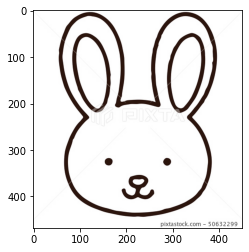

In [4]:
img = cv2.cvtColor(cv2.imread('rabbit.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [5]:
img.shape

(468, 450, 3)

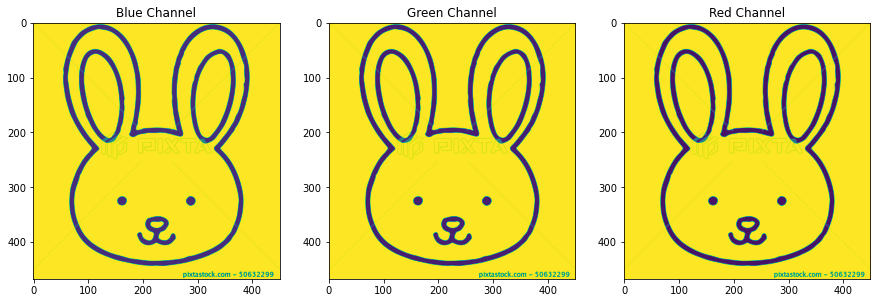

In [6]:
#Splitting into channels
blue,green,red = cv2.split(img)
# Plotting the images
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)
fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)
fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)
plt.show()

In [7]:
red_temp_df = pd.DataFrame(data = red)
red_temp_df

,0,1,2,3,4,5,6,7,8,9,...,440,441,442,443,444,445,446,447,448,449
0,253,255,255,255,255,255,255,254,255,255,...,255,255,254,254,255,255,254,254,255,255
1,245,252,255,254,253,255,255,254,255,255,...,254,255,255,254,254,255,255,255,246,245
2,247,247,250,255,255,255,254,255,255,255,...,254,255,255,255,255,255,255,252,246,247
3,254,247,246,252,255,255,254,255,255,255,...,255,254,254,255,255,254,250,246,251,253
4,255,255,250,246,249,255,255,253,255,255,...,255,254,255,255,255,249,246,247,254,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
464,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
465,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
466,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [8]:
df_blue = blue/255
df_green = green/255
df_red = red/255

In [9]:
pca_b = PCA(n_components=5)
pca_b.fit(df_blue)
trans_pca_b = pca_b.transform(df_blue)
pca_g = PCA(n_components=5)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)
pca_r = PCA(n_components=5)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [10]:
print(trans_pca_b.shape)
print(trans_pca_r.shape)
print(trans_pca_g.shape)

(468, 5)
(468, 5)
(468, 5)


In [11]:
print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")

Blue Channel : 0.5415073934521148
Green Channel: 0.5445706430345063
Red Channel  : 0.5472269614076524


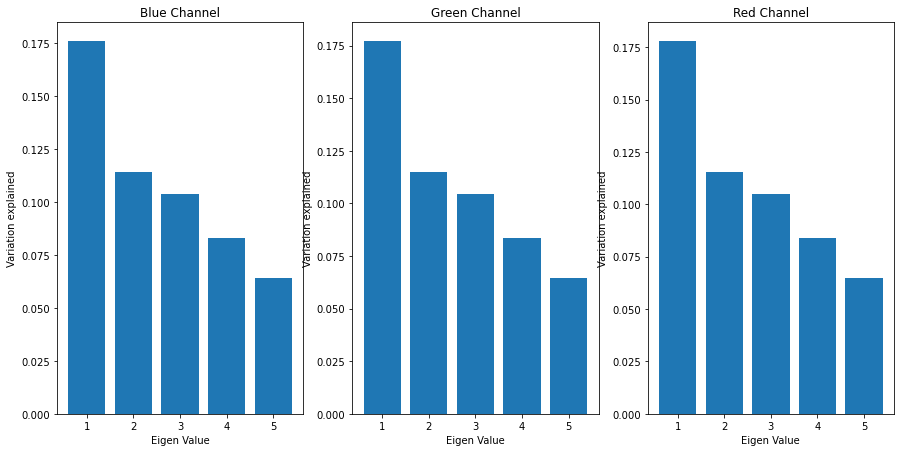

In [12]:
fig = plt.figure(figsize = (15, 7.2)) 
fig.add_subplot(131)
plt.title("Blue Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,6)),pca_b.explained_variance_ratio_)
fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,6)),pca_g.explained_variance_ratio_)
fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,6)),pca_r.explained_variance_ratio_)
plt.show()

In [13]:
b_arr = pca_b.inverse_transform(trans_pca_b)
g_arr = pca_g.inverse_transform(trans_pca_g)
r_arr = pca_r.inverse_transform(trans_pca_r)
print(b_arr.shape, g_arr.shape, r_arr.shape)

(468, 450) (468, 450) (468, 450)


In [14]:
img_reduced= (cv2.merge((b_arr, g_arr, r_arr)))
print(img_reduced.shape)

(468, 450, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


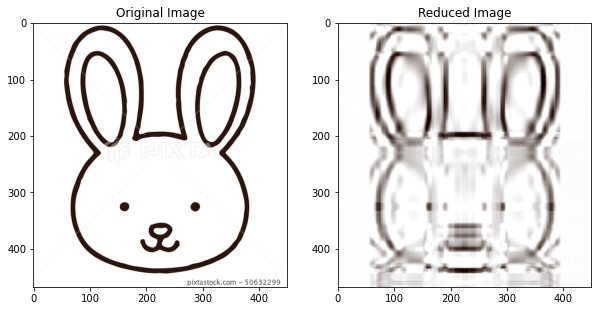

In [15]:
fig = plt.figure(figsize = (10, 7.2)) 
fig.add_subplot(121)
plt.title("Original Image")
plt.imshow(img)
fig.add_subplot(122)
plt.title("Reduced Image")
plt.imshow(img_reduced)
plt.show()

In [16]:
from matplotlib.image import imread

In [19]:
img = imread('rabbit.jpg')

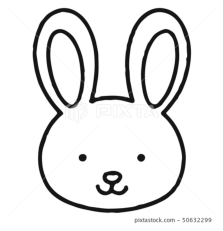

In [20]:
X = np.mean(img, -1)
A = plt.imshow(X)
A.set_cmap('gray')
plt.axis('off')
plt.show()

In [21]:
u, s, vh = np.linalg.svd(X, full_matrices=False)

In [22]:
u.shape, s.shape, vh.shape

((468, 450), (450,), (450, 450))

In [23]:
s = np.diag(s)
X_approx = u[:,:5]@s[:5,:5]@vh[:5,:]

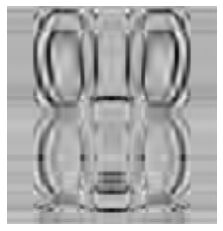

In [24]:
A = plt.imshow(X_approx)
A.set_cmap('gray')
plt.axis('off')
plt.show()

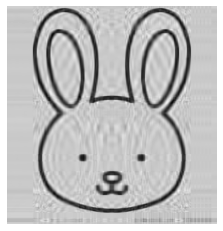

In [25]:
X_approx = u[:,:20]@s[:20,:20]@vh[:20,:]
A = plt.imshow(X_approx)
A.set_cmap('gray')
plt.axis('off')
plt.show()

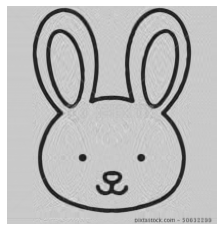

In [26]:
X_approx = u[:,:50]@s[:50,:50]@vh[:50,:]
A = plt.imshow(X_approx)
A.set_cmap('gray')
plt.axis('off')
plt.show()

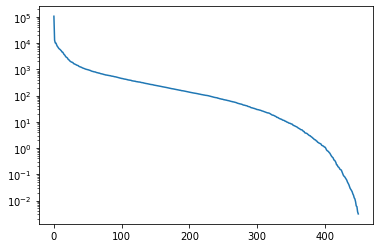

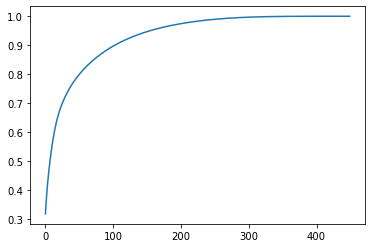

In [27]:
plt.figure(1)
plt.semilogy(np.diag(s))
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(s)/np.sum(np.diag(s))))
plt.show()

In [28]:
w, v = np.linalg.eig(X)
w, v

LinAlgError: Last 2 dimensions of the array must be square